In [12]:
import matplotlib.pyplot as plt
from monte_carlo.surrogate.extreme_learning import *

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

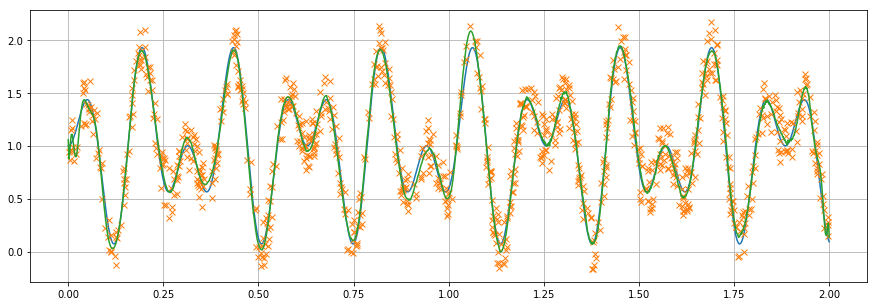

In [13]:
basis = TrigBasis(1, (0, 100), (-1, 0))

N = 1000
node_count = 80
fn = lambda xs: np.sin(40 * xs)*np.sin(10*xs) + 1
xs = np.random.rand(N).reshape(N, 1)*2
values = fn(xs) + (np.random.rand(N).reshape(N, 1) - .5) / 2
params, bias, weights = basis.extreme_learning_train(xs, values, node_count)


plt.figure(figsize=(15, 5))

x = np.linspace(0, 1, 1000) * 2
plt.plot(x, fn(x))
plt.plot(xs, values, 'x')
plt.plot(x, basis.eval_all(params, bias, weights, x.reshape(1000,1)))
# plt.plot(-params[0], [-1.5]*node_count, '+')
plt.grid()

plt.show()

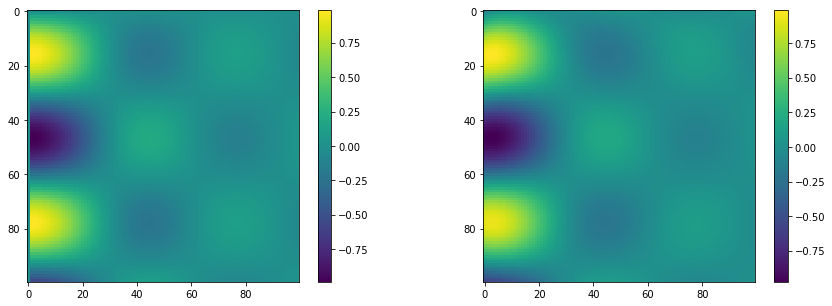

In [2]:
basis = TrigBasis(2, (-10, 10), (-1, 0))

N = 10000
node_count = 100
fn = lambda xs, ys: np.sin(10 * xs)/(10 *xs+.001) * np.sin(10 * ys)
xs = np.random.rand(N * 2).reshape(N, 2)*2
values = fn(*xs.transpose())

params, bias, weights = basis.extreme_learning_train(xs, values, node_count)


plt.figure(figsize=(15, 5))

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100) 
mgrid = np.meshgrid(x, y)

plt.subplot(121)
values = np.random.random((100, 100))
plt.imshow(fn(*mgrid))
plt.colorbar()
plt.subplot(122)

out = basis.eval_all(params, bias, weights, *mgrid)
# params_single = np.array([params[0][index]]), np.array([params[1][index,:]]), params[2]
# print(params_single)
# out = basis.eval_all(params_single, bias, np.array([weights[index]]), *mgrid)

plt.imshow(out)
plt.colorbar()

plt.show()

In [3]:
basis = GaussianBasis(2, center_range=(-1, 1), width_range=(0, 1))

N = 10000
# for very large numbers (compared to N), noise appears in the fit (very large spikes)
node_count = 200 
fn = lambda xs, ys: np.sin(10 * xs)/(10 *xs+.001) * np.sin(10 * ys)
xs = (np.random.rand(N * 2).reshape(N, 2) -.5)*2
values = fn(*xs.transpose())

params, bias, weights = basis.extreme_learning_train(xs, values, node_count)

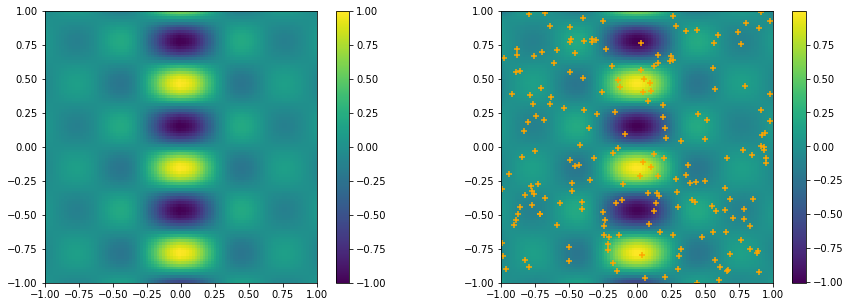

In [4]:
plt.figure(figsize=(15, 5))

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100) 
mgrid = np.meshgrid(x, y)

plt.subplot(121)
values = np.random.random((100, 100))
plt.imshow(fn(*mgrid), vmin=-1, vmax=1, extent=(-1, 1, -1, 1))
plt.colorbar()
plt.subplot(122)

# params_single = np.array([params[0][0,:]]), np.array([params[1][0]]), params[2]
# out = basis.eval_all(params_single, bias, np.array([weights[0]]), *mgrid)
out = basis.eval_all(params, bias, weights, *mgrid)
plt.imshow(out, extent=(-1, 1, -1, 1))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.colorbar()
centerx, centery = params[0].transpose()
plt.scatter(centerx, -centery, marker='+', color='orange')

plt.show()

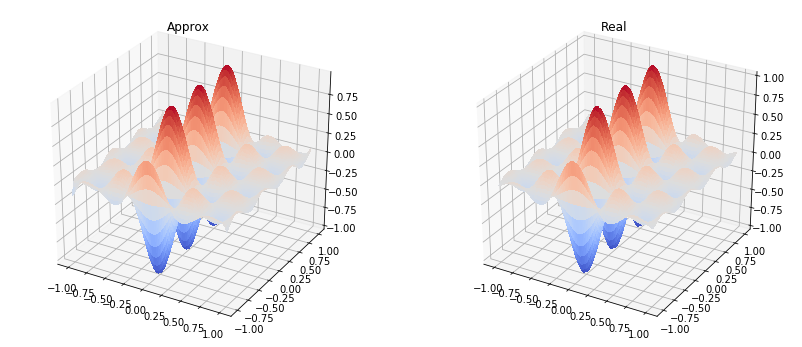

In [5]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(mgrid[0], mgrid[1], out, rstride=1, cstride=1, linewidth=0, antialiased=False, cmap=cm.coolwarm)
plt.title("Approx")

# p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(mgrid[0], mgrid[1], fn(*mgrid), rstride=1, cstride=1, linewidth=0, antialiased=False, cmap=cm.coolwarm)
plt.title("Real")

plt.show()

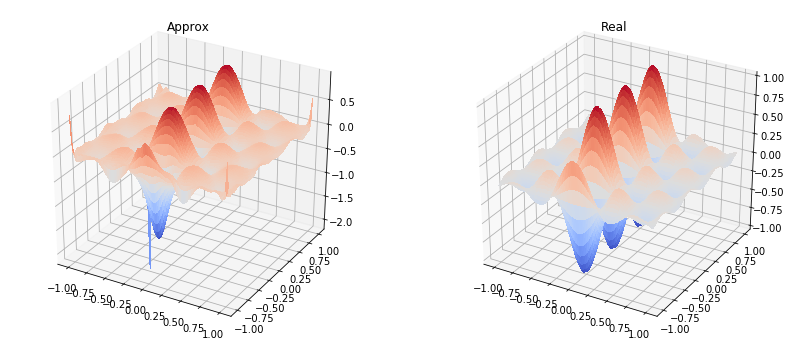

In [82]:
# example of overfitting

basis = GaussianBasis(2, center_range=(-1, 1), width_range=(0, 1))

N = 10000
node_count = 500 
fn = lambda xs, ys: np.sin(10 * xs)/(10 *xs+.001) * np.sin(10 * ys)

xs = (np.random.rand(N * 2).reshape(N, 2) -.5)*2
values = fn(*xs.transpose())

params, bias, weights = basis.extreme_learning_train(xs, values, node_count)

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100) 
mgrid = np.meshgrid(x, y)
out = basis.eval_all(params, bias, weights, *mgrid)


fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(mgrid[0], mgrid[1], out, rstride=1, cstride=1, linewidth=0, antialiased=False, cmap=cm.coolwarm)
plt.title("Approx")

# p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(mgrid[0], mgrid[1], fn(*mgrid), rstride=1, cstride=1, linewidth=0, antialiased=False, cmap=cm.coolwarm)
plt.title("Real")

plt.show()

In [31]:
basis = GaussianBasis(2, center_range=(-1, 1), width_range=(0, 1), multi_widths=True)

N = 10000
# for very large numbers (compared to N), noise appears in the fit (very large spikes)
node_count = 200 
fn = lambda xs, ys: np.sin(10 * xs)/(10 *xs+.001) * np.sin(10 * ys)
xs = (np.random.rand(N * 2).reshape(N, 2) -.5)*2
values = fn(*xs.transpose())

params, bias, weights = basis.extreme_learning_train(xs, values, node_count)

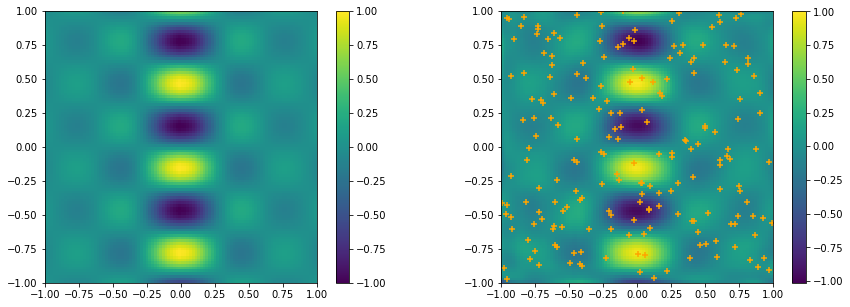

In [32]:
plt.figure(figsize=(15, 5))

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100) 
mgrid = np.meshgrid(x, y)

plt.subplot(121)
values = np.random.random((100, 100))
plt.imshow(fn(*mgrid), vmin=-1, vmax=1, extent=(-1, 1, -1, 1))
plt.colorbar()
plt.subplot(122)

# params_single = np.array([params[0][0,:]]), np.array([params[1][0]]), params[2]
# out = basis.eval_all(params_single, bias, np.array([weights[0]]), *mgrid)
out = basis.eval_all(params, bias, weights, *mgrid)
plt.imshow(out, extent=(-1, 1, -1, 1))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.colorbar()
centerx, centery = params[0].transpose()
plt.scatter(centerx, -centery, marker='+', color='orange')

plt.show()